# Importing Laibraries

In [252]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from tensorflow.keras.callbacks import EarlyStopping


# Importing DataSet

In [253]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Cleaning & Preprocessing

### 1. Shape Of The Data

In [254]:
df.shape

(5110, 12)

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### 2. Remove Null Values

In [256]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [257]:
df.dropna(inplace=True)

In [258]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [259]:
df.duplicated().sum()

0

Delete Id Column(Not Relaible For Modeling)

In [260]:
del df['id']
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [261]:
df.reset_index(inplace=True,drop=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# Exploratory Data Analysis(EDA) 

### 1. Uniqueness Of the Columns

In [262]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [263]:
df.hypertension.unique()

array([0, 1], dtype=int64)

In [264]:
df.age.unique()

array([6.70e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01, 7.40e+01,
       6.90e+01, 7.80e+01, 6.10e+01, 5.40e+01, 5.00e+01, 6.40e+01,
       7.50e+01, 6.00e+01, 7.10e+01, 5.20e+01, 8.20e+01, 6.50e+01,
       5.70e+01, 4.20e+01, 4.80e+01, 7.20e+01, 5.80e+01, 7.60e+01,
       3.90e+01, 7.70e+01, 6.30e+01, 7.30e+01, 5.60e+01, 4.50e+01,
       7.00e+01, 5.90e+01, 6.60e+01, 4.30e+01, 6.80e+01, 4.70e+01,
       5.30e+01, 3.80e+01, 5.50e+01, 4.60e+01, 3.20e+01, 5.10e+01,
       1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01, 3.50e+01,
       2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01, 1.70e+01,
       1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01, 2.90e+01,
       1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01, 3.60e+01,
       6.40e-01, 3.40e+01, 4.10e+01, 8.80e-01, 5.00e+00, 2.60e+01,
       3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00, 9.00e+00,
       1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.20e-01, 1.08e+00,
       1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e+00, 1.72e

In [265]:
df.heart_disease.unique()

array([1, 0], dtype=int64)

In [266]:
df.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [267]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [268]:
df.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [269]:
df.avg_glucose_level.unique()

array([228.69, 105.92, 171.23, ...,  82.99, 166.29,  85.28])

In [270]:
df.bmi.unique()

array([36.6, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8, 27.3,
       28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5, 28.3,
       44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9, 28.5,
       26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8, 40.4,
       25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. , 24.1,
       45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2, 29.4,
       24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1, 31.3,
       31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8, 21.8,
       27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2, 23.6,
       22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. , 42.5,
       35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. , 28.6,
       42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4, 40.5,
       36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. , 22. ,
       39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23.7, 24

In [271]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [272]:
df.stroke.unique()

array([1, 0], dtype=int64)

In [273]:
df.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

Remove 1 Value of Other in "gender" Column

In [274]:
df=df[df['gender']!='Other']

In [275]:
df.gender.value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

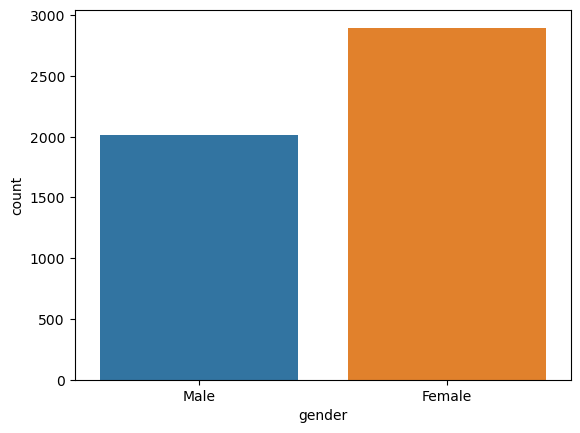

In [276]:
sns.countplot(data=df,x='gender')

In [277]:
np.mean(df['age'])

42.868810105949485

In [278]:
df.ever_married.value_counts()

Yes    3204
No     1704
Name: ever_married, dtype: int64

<AxesSubplot:xlabel='ever_married', ylabel='count'>

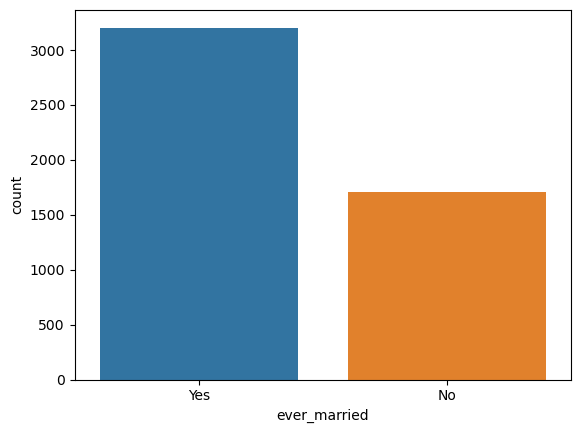

In [279]:
sns.countplot(data=df,x='ever_married')

In [280]:
df.work_type.value_counts()

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

<AxesSubplot:xlabel='work_type', ylabel='count'>

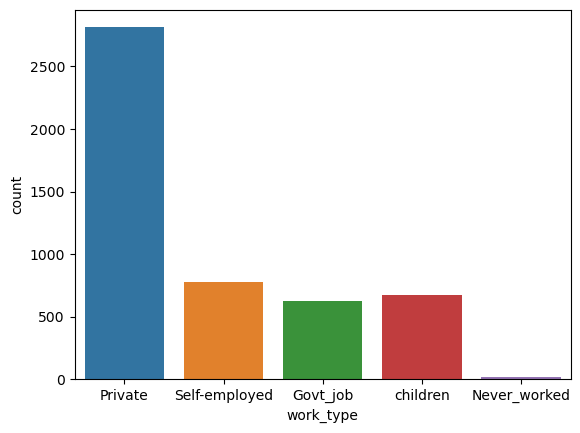

In [281]:
sns.countplot(data=df,x='work_type')

In [282]:
df.Residence_type.value_counts()

Urban    2490
Rural    2418
Name: Residence_type, dtype: int64

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

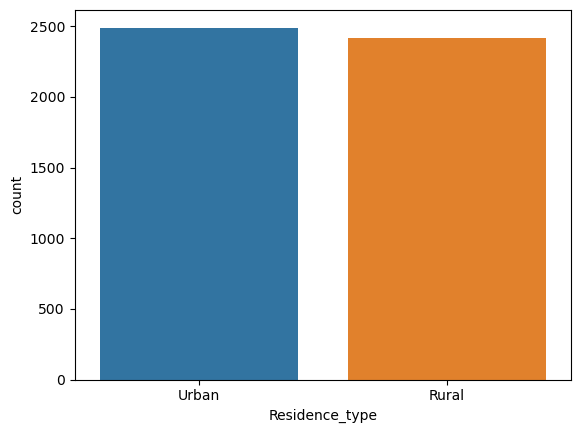

In [283]:
sns.countplot(data=df,x='Residence_type')

In [284]:
df.smoking_status.value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

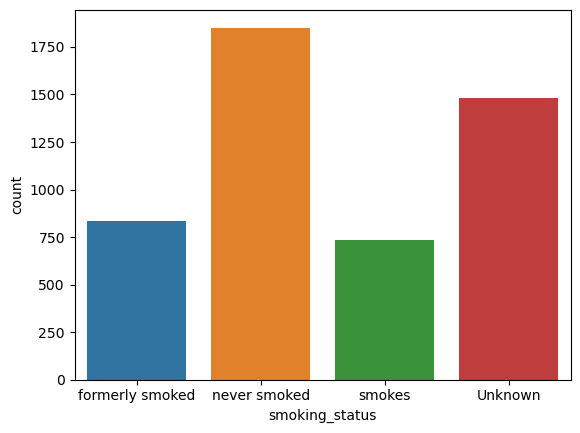

In [285]:
sns.countplot(data=df,x='smoking_status')

In [286]:
df.stroke.value_counts()

0    4699
1     209
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

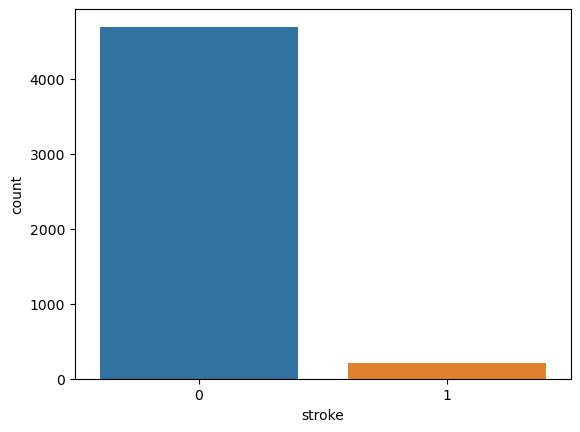

In [287]:
sns.countplot(data=df,x='stroke')

In [288]:
df.heart_disease.value_counts()

0    4665
1     243
Name: heart_disease, dtype: int64

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

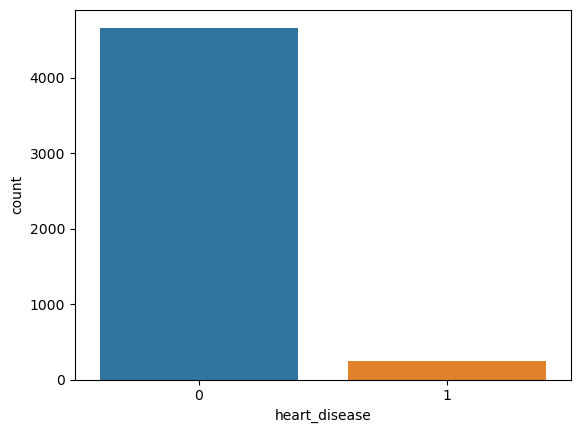

In [289]:
sns.countplot(data=df,x='heart_disease')

In [290]:
df.hypertension.value_counts()

0    4457
1     451
Name: hypertension, dtype: int64

<AxesSubplot:xlabel='hypertension', ylabel='count'>

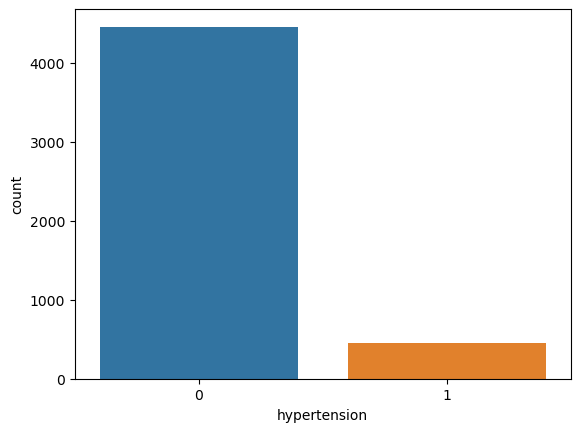

In [291]:
sns.countplot(data=df,x='hypertension')

<AxesSubplot:xlabel='age', ylabel='Count'>

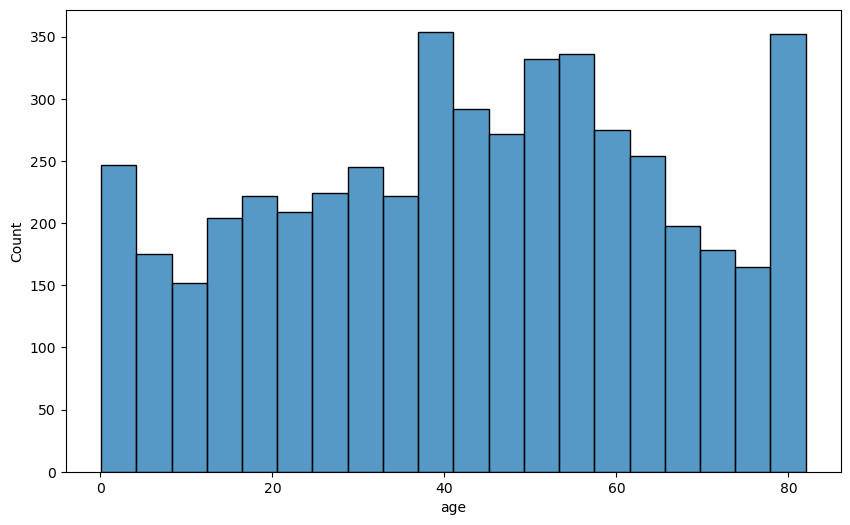

In [292]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='age')

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

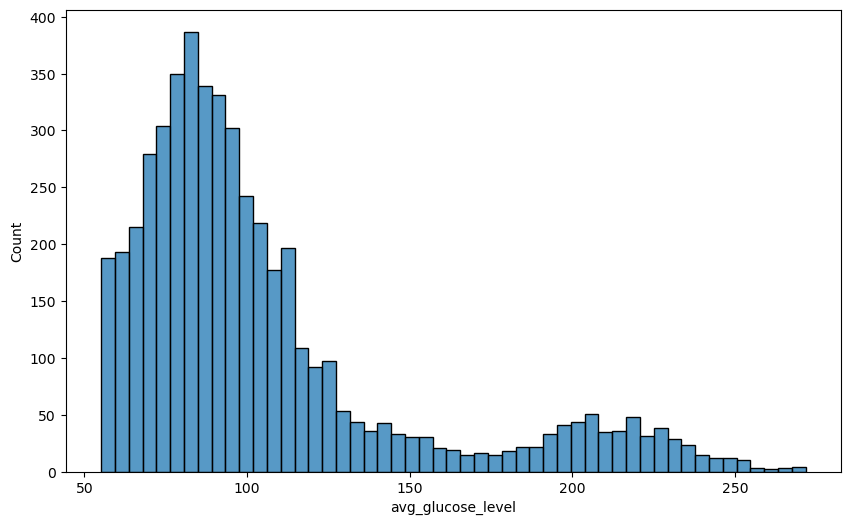

In [293]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='avg_glucose_level')

<AxesSubplot:xlabel='bmi', ylabel='Count'>

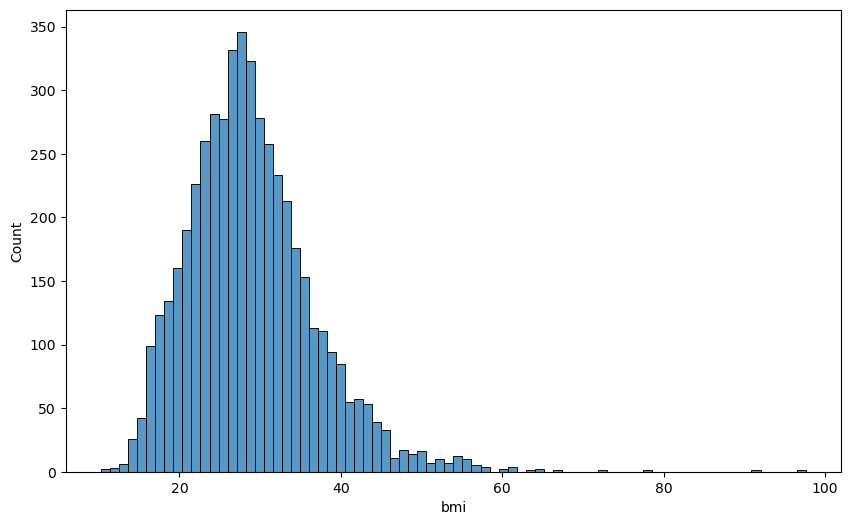

In [294]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='bmi')

In [295]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.274395,0.257104,0.236000,0.333314,0.232313
hypertension,0.274395,1.000000,0.115978,0.180614,0.167770,0.142503
heart_disease,0.257104,0.115978,1.000000,0.154577,0.041322,0.137929
avg_glucose_level,0.236000,0.180614,0.154577,1.000000,0.175672,0.138984
bmi,0.333314,0.167770,0.041322,0.175672,1.000000,0.042341
stroke,0.232313,0.142503,0.137929,0.138984,0.042341,1.000000


<AxesSubplot:>

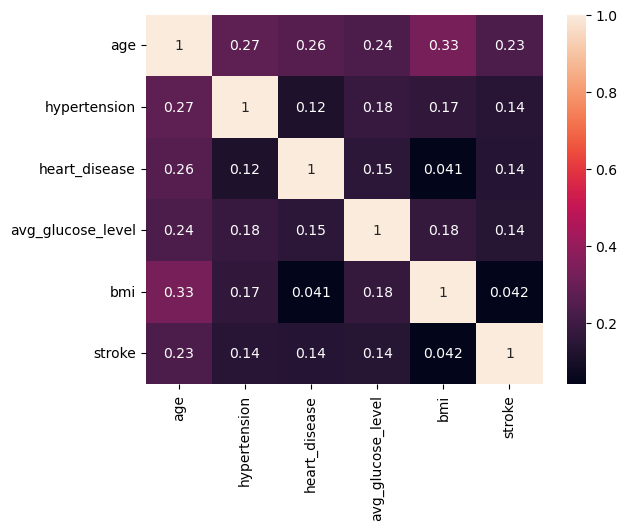

In [296]:
sns.heatmap(df.corr(),annot=True)

In [297]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# Data Encoding

In [298]:
le=LabelEncoder()

In [299]:
df['gender']=le.fit_transform(df['gender'])
df['ever_married']=le.fit_transform(df['ever_married'])
df['work_type']=le.fit_transform(df['work_type'])
df['Residence_type']=le.fit_transform(df['Residence_type'])
df['smoking_status']=le.fit_transform(df['smoking_status'])

In [300]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,1,80.0,0,1,1,2,0,105.92,32.5,2,1
2,0,49.0,0,0,1,2,1,171.23,34.4,3,1
3,0,79.0,1,0,1,3,0,174.12,24.0,2,1
4,1,81.0,0,0,1,2,1,186.21,29.0,1,1


# Data Seperation

In [301]:
x=df.drop('stroke',axis=1)
y=df.stroke

In [302]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
1,1,80.0,0,1,1,2,0,105.92,32.5,2
2,0,49.0,0,0,1,2,1,171.23,34.4,3
3,0,79.0,1,0,1,3,0,174.12,24.0,2
4,1,81.0,0,0,1,2,1,186.21,29.0,1


In [303]:
x.shape

(4908, 10)

In [304]:
y.shape

(4908,)

In [305]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [306]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3926 entries, 4782 to 857
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3926 non-null   int32  
 1   age                3926 non-null   float64
 2   hypertension       3926 non-null   int64  
 3   heart_disease      3926 non-null   int64  
 4   ever_married       3926 non-null   int32  
 5   work_type          3926 non-null   int32  
 6   Residence_type     3926 non-null   int32  
 7   avg_glucose_level  3926 non-null   float64
 8   bmi                3926 non-null   float64
 9   smoking_status     3926 non-null   int32  
dtypes: float64(3), int32(5), int64(2)
memory usage: 260.7 KB


In [307]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 3926 entries, 4782 to 857
Series name: stroke
Non-Null Count  Dtype
--------------  -----
3926 non-null   int64
dtypes: int64(1)
memory usage: 61.3 KB


# Data Modeling With ANN

In [308]:
model=tf.keras.Sequential([
    
    tf.keras.layers.InputLayer(input_shape=10),
    
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(8,activation='relu'),
    

    
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [309]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [310]:
early_stopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [311]:
history=model.fit(x_train,y_train,epochs=15,verbose=1,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/15
99/99 [==============================] - 1s 6ms/step - loss: 0.9037 - accuracy: 0.8389 - val_loss: 0.5089 - val_accuracy: 0.9275
Epoch 2/15
99/99 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.9118 - val_loss: 0.3692 - val_accuracy: 0.9415
Epoch 3/15
99/99 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.9347 - val_loss: 0.2709 - val_accuracy: 0.9542
Epoch 4/15
99/99 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.9516 - val_loss: 0.2043 - val_accuracy: 0.9618
Epoch 5/15
99/99 [==============================] - 0s 2ms/step - loss: 0.2201 - accuracy: 0.9548 - val_loss: 0.1690 - val_accuracy: 0.9631
Epoch 6/15
99/99 [==============================] - 0s 2ms/step - loss: 0.1883 - accuracy: 0.9561 - val_loss: 0.1528 - val_accuracy: 0.9631
Epoch 7/15
99/99 [==============================] - 0s 2ms/step - loss: 0.1768 - accuracy: 0.9554 - val_loss: 0.1604 - val_accuracy: 0.9593
Epoch 8/15
99/99 [==

# Graph Representation Of Loss & Accuracy

### 1. Loss

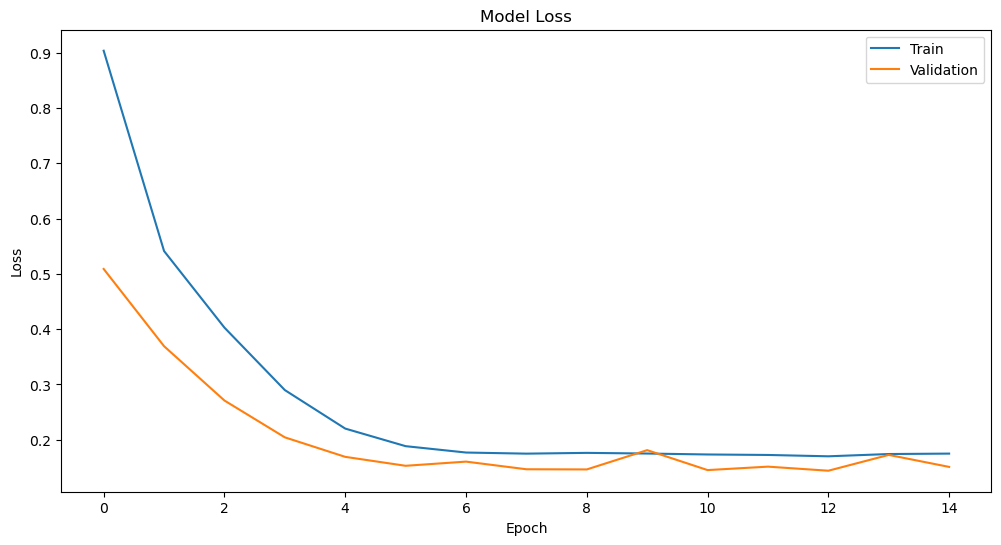

In [312]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

### 2. Accuracy

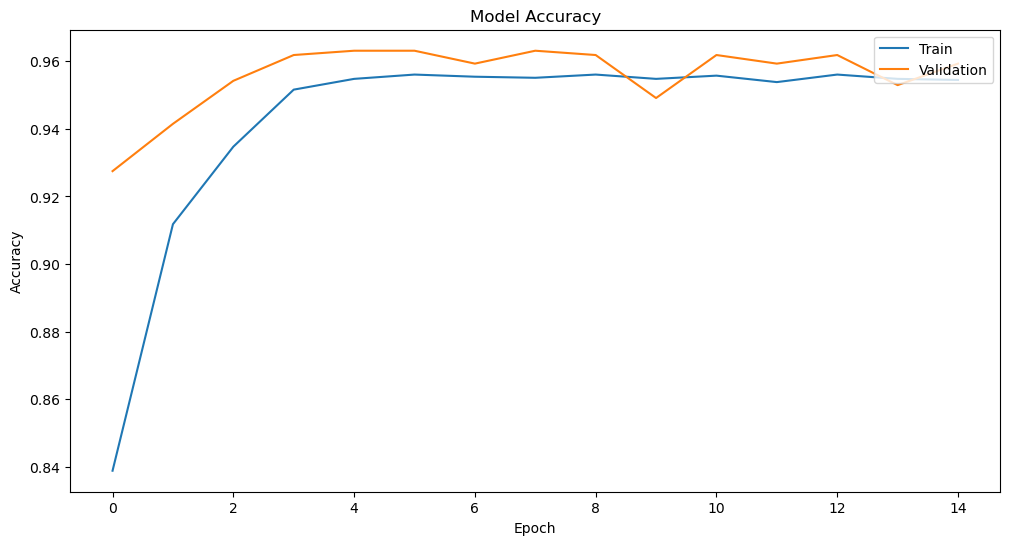

In [313]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

# Evaluation Of Loss & Accuracy On Test Data

In [315]:
loss,accuracy=model.evaluate(x_test,y_test)
print(f"Test Loss:{loss}")
print(f"Test accuracy:{accuracy}")

31/31 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9542
Test Loss:0.15853102505207062
Test accuracy:0.9541751742362976
